<a href="https://colab.research.google.com/github/mfathul21/scorecard-credit-prediction/blob/main/Scorecard_Credit_Prediction_PB_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit Risk Prediction Project**

## **Introduction**

Credit risk prediction is a crucial aspect of the lending industry, as it helps financial institutions assess the likelihood of borrowers defaulting on their loans. Accurate prediction models enable lenders to make informed decisions, minimize potential losses, and optimize their loan portfolios. In this context, leveraging historical loan data can provide valuable insights into borrower behavior and enhance the accuracy of risk assessments.

### **Business Understanding**

#### **Background**

From 2007 to 2014, the financial industry witnessed significant changes and challenges, including the aftermath of the 2008 financial crisis, which highlighted the importance of robust risk management practices. During this period, lending institutions accumulated extensive data on loan customers, providing a valuable resource for developing predictive models to assess credit risk. Multifinance companies face significant challenges in assessing and managing credit risk. Inaccurate decisions in risk assessment can result in large losses, both in the form of bad debts and in the form of ignoring potential business opportunities. For this reason, this multifinance company wanted to improve the accuracy of credit risk assessment to optimize business decisions and reduce potential losses.

#### **Objective**

The objective of this project is to enhance the accuracy of credit risk prediction by leveraging historical loan customer data from 2007 to 2014. By developing and implementing a predictive model, we aim to:

1. **Reduce Non-Performing Loans (NPL)**: Identify high-risk borrowers more accurately to minimize the proportion of loans that default.
2. **Improve Repayment Rate**: Increase the percentage of loans that are repaid on time by better assessing borrower reliability.
3. **Optimize Decision-Making**: Provide data-driven insights to support lending decisions, ensuring a healthier loan portfolio and improved financial performance.

### **Analytic Approch**

### **Dataset Information**

The dataset spans from 2007 to 2014 and includes comprehensive information on loan applications, borrower demographics, financial status, and repayment behavior. The dataset contains more than 460,000 rows of data with 74 features, consisting of 22 categorical features and 52 numerical features. For more detailed information about the data, please refer to the Google Spreadsheet [here](https://docs.google.com/spreadsheets/d/1-wFpl6fjMofN3VRMsQAY-vSLqjvwfdPR/edit?usp=sharing&ouid=111539014006932525048&rtpof=true&sd=true). The dataset can be downloaded from the following link: [Download Dataset](https://drive.google.com/file/d/1Wlhar_2fM6YW9NVsdS_5Zvp5OD7ZSo5k/view?usp=sharing).

## **Data Understanding**

### **Load Data**

In [1]:
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None
sns.set_style('darkgrid')

In [73]:
config_data = utils.config_load()
df = pd.read_csv(config_data['raw_dataset_path'], index_col=0)

loan = df.copy()

In [3]:
loan = df.copy()
loan.head(5)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **Data Overview**

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

In [74]:
cat_col = loan.select_dtypes(object).columns.to_list()
num_col = loan.select_dtypes(np.number).columns.to_list()

print(f'Total Entries Data: {len(loan)}')
print(f'Total Columns : {len(loan.columns.to_list())}')
print(f'Number of Categorical Columns : {len(cat_col)}')
print(f'Number of Numerical Columns : {len(num_col)}')

Total Entries Data: 466285
Total Columns : 74
Number of Categorical Columns : 22
Number of Numerical Columns : 52


In [6]:
loan[cat_col].describe()

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,125981,466285,466264,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,124435,14,63098,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,234,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


In [7]:
loan[num_col].describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.790000e+04,NaN,NaN,NaN
max,3.809811e+07,4.086083e+07,35000.000000,35000.000000,35000.000000,26.060000,

Terdapat beberapa feature kategori yang seharusnya merupakan feature numerik atau date. Oleh karena itu akan dilakukan preprocessing data pada feature tersebut untuk mengubah tipe data menjadi numeric (int/float) dan date.

## **Exploratory Data Analysis (EDA)**

Prior to EDA, irrelevant features will be removed so that the dataset is cleaner and ready for further analysis. The following are the steps that will be taken:

- We need to drop the columns having > 20% missing values.
- The follwing features are identifiers and can not be used in building model. id, member id, url, title, desc, zipcode, policy_code, and emp_title
- The sub_grade column wll also be droped as it contains the same information as the grade columns.
- Features that contain information about the future will not be included in building the model since those events are yet to occur. The features include - pymnt_plan, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, next_pymnt_d, and last_credit_pull_d.

In [8]:
drop_col = config_data['post_approval_columns'].copy()
drop_col.extend(config_data['irrelevant_columns'])
drop_col.extend(config_data['missing_columns'])

loan_df = loan.drop(columns=drop_col, axis=1)
loan_df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,collections_12_mths_ex_med,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000,5000,4975.0,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,13648,83.7,9.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,1687,9.4,4.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,2956,98.5,10.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0,Feb-96,1.0,10.0,0.0,5598,21.0,37.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,OR,17.94,0.0,Jan-96,0.0,15.0,0.0,27783,53.9,38.0,f,0.0,INDIVIDUAL,0.0,NaN,NaN,NaN


In [9]:
loan_df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

Loan status often has multiple values, requiring a clear definition of what constitutes a defaulting customer to classify them as either a good borrower or a bad borrower.
- **Good borrower**: Current, Fully Paid, In Grace Period, and Does not meet the credit policy. Status:Fully Paid.
- **Bad borrower**: Charged Off, Default, Does not meet the credit policy. Status:Charged Off, Late (31-120 days), and Late (16-30 days).

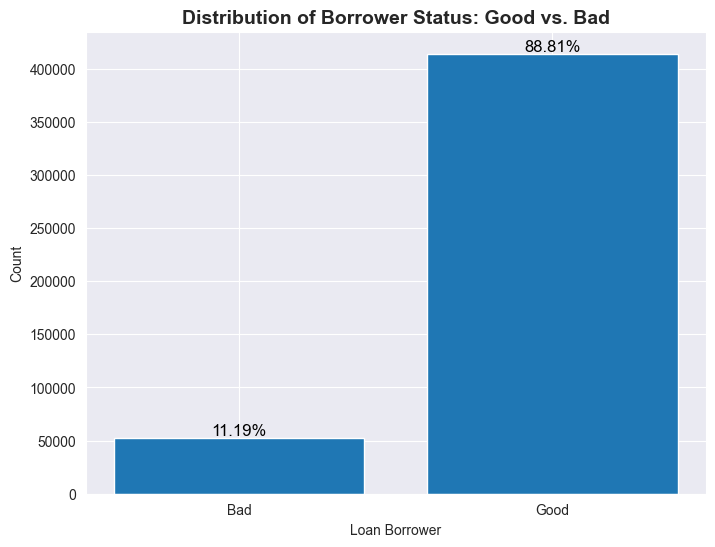

In [10]:
loan_df['good_borrower'] = np.where(loan_df['loan_status'].isin(['Charged Off', 'Default',
                                                      'Does not meet the credit policy. Status:Charged Off',
                                                      'Late (31-120 days)', 'Late (16-30 days)']), 0, 1)

fig, ax =plt.subplots(figsize=(8,6))
plt.bar(loan_df['good_borrower'].value_counts().index, loan_df['good_borrower'].value_counts())
utils.annotate_text(loan_df['good_borrower'], ax, True)
plt.title("Distribution of Borrower Status: Good vs. Bad", fontdict={'fontsize':14, 'weight':'bold'})
plt.xlabel("Loan Borrower")
plt.ylabel("Count")
plt.xticks(np.arange(2), ['Bad','Good'])

plt.show()

Based on loan data from 2007-2014, it was found that 11% of borrowers during this period were bad borrowers. With this understanding, the next step is to use this data as a foundation to develop a predictive model that can identify potential bad borrowers early, minimize credit risk, and improve overall loan decision-making.

### **Categorical Features**

In [11]:
loan_cat = loan_df.select_dtypes(object)
loan_cat['good_borrower'] = loan_df['good_borrower'] 
loan_cat.head()

,term,grade,emp_length,home_ownership,verification_status,issue_d,loan_status,purpose,addr_state,earliest_cr_line,initial_list_status,application_type,good_borrower
0,36 months,B,10+ years,RENT,Verified,Dec-11,Fully Paid,credit_card,AZ,Jan-85,f,INDIVIDUAL,1
1,60 months,C,< 1 year,RENT,Source Verified,Dec-11,Charged Off,car,GA,Apr-99,f,INDIVIDUAL,0
2,36 months,C,10+ years,RENT,Not Verified,Dec-11,Fully Paid,small_business,IL,Nov-01,f,INDIVIDUAL,1
3,36 months,C,10+ years,RENT,Source Verified,Dec-11,Fully Paid,other,CA,Feb-96,f,INDIVIDUAL,1
4,60 months,B,1 year,RENT,Source Verified,Dec-11,Current,other,OR,Jan-96,f,INDIVIDUAL,1


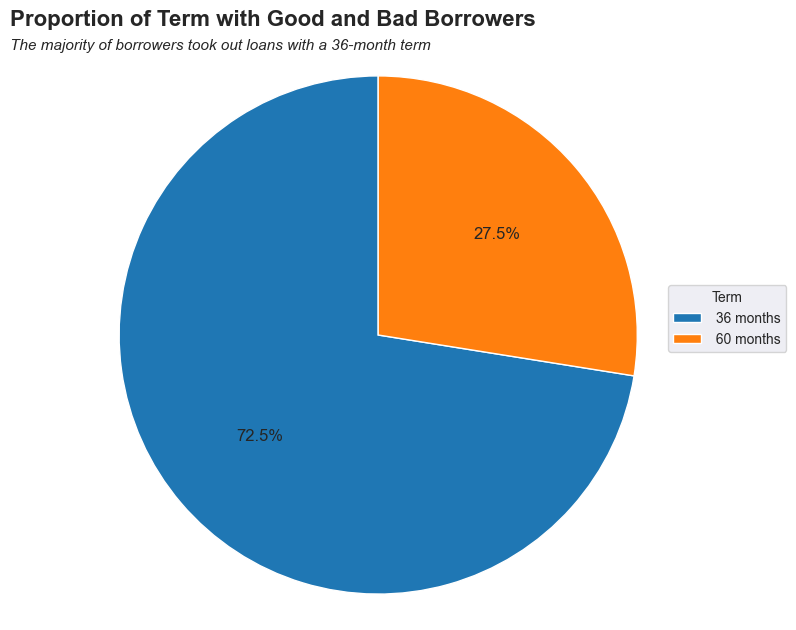

In [12]:
utils.pie_proportion(data=loan_cat, 
                     col='term', 
                     subtitle="The majority of borrowers took out loans with a 36-month term")

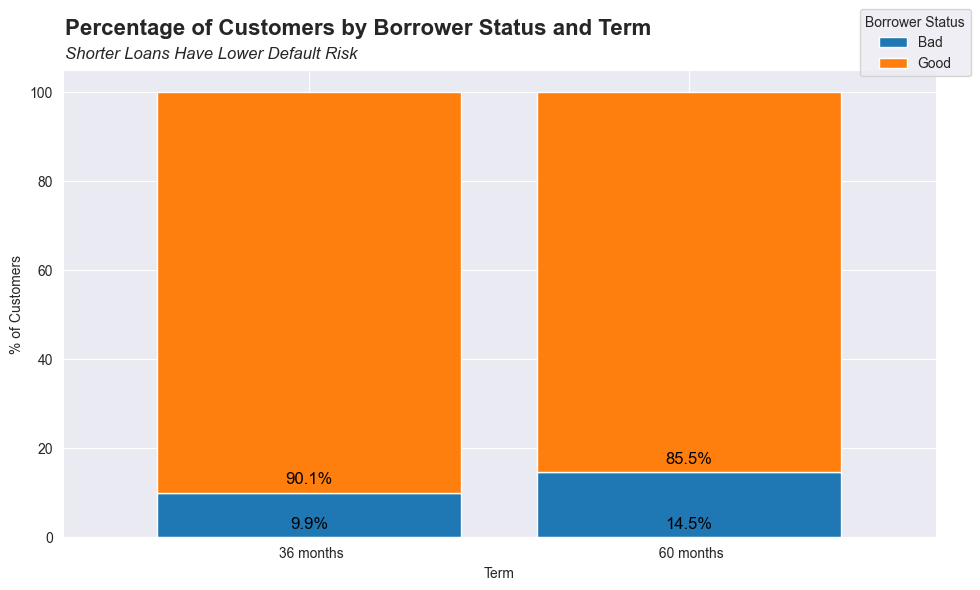

In [13]:
df_loan = loan_cat.groupby('term')['good_borrower'].value_counts()
df_loan = (df_loan / df_loan.groupby(level=0).sum()) * 100

utils.stacked_bar_proportion(data=df_loan, 
                             col='term', 
                             subtitle="Shorter Loans Have Lower Default Risk")

Borrowers with shorter loan durations (36 months) generally face lower repayment difficulties or default risks compared to those with longer loan durations (60 months). This could be because shorter loan terms involve higher monthly payments, leading to a faster reduction of the principal amount, thereby lowering the overall interest paid and the likelihood of default. Additionally, the 'term' feature will be converted to an integer data type.

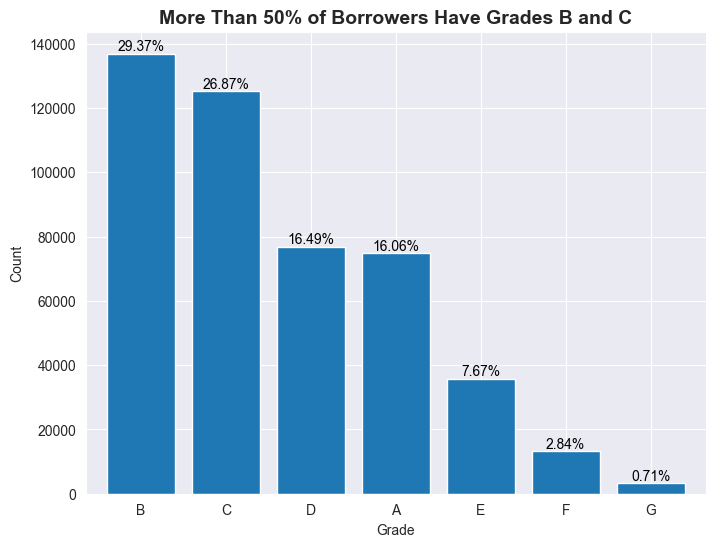

In [14]:
fig, ax = plt.subplots(figsize=(8,6))
loan_cat['grade'].value_counts().plot(kind='bar', rot=0, width=0.8)
utils.annotate_text(data=loan_cat['grade'], 
                    axis=ax, 
                    prop=True, 
                    fontsize=10)
plt.title("More Than 50% of Borrowers Have Grades B and C", fontdict={'fontsize':14, 'weight':'bold'})
plt.xlabel("Grade")
plt.ylabel("Count")
plt.show()

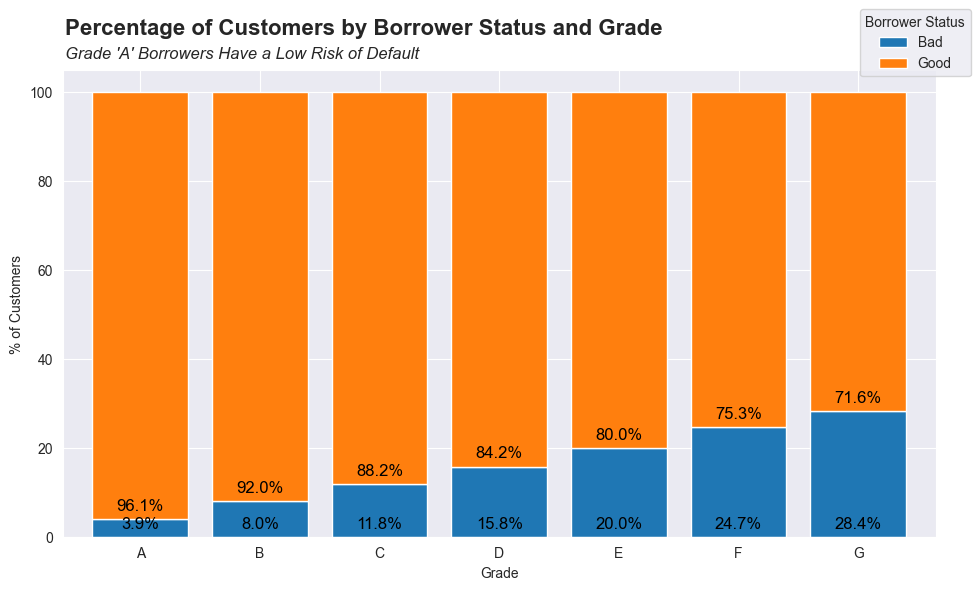

In [15]:
df_loan = loan_cat.groupby('grade')['good_borrower'].value_counts()
df_loan = (df_loan / df_loan.groupby(level=0).sum()) * 100

utils.stacked_bar_proportion(data=df_loan, 
                             col='grade', 
                             subtitle="Grade 'A' Borrowers Have a Low Risk of Default")

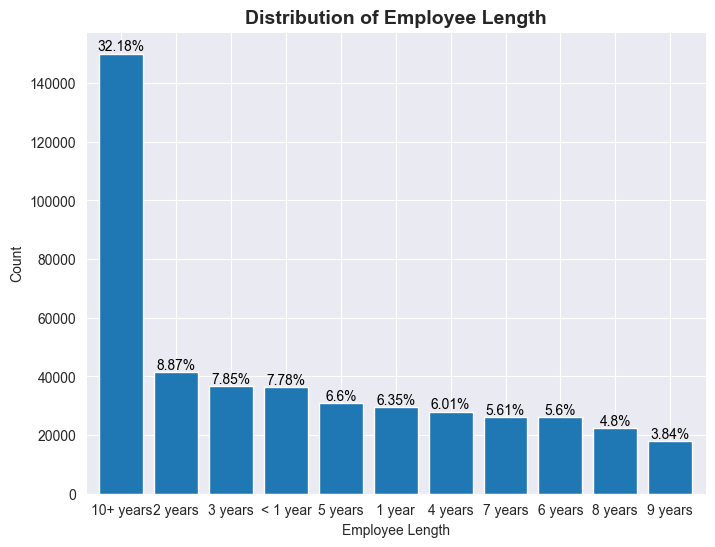

In [16]:
fig, ax = plt.subplots(figsize=(8,6))
loan_cat['emp_length'].value_counts().plot(kind='bar', rot=0, width=0.8)
utils.annotate_text(data=loan_cat['emp_length'], 
                    axis=ax, 
                    prop=True, 
                    fontsize=10)
plt.title("Distribution of Employee Length", fontdict={'fontsize':14, 'weight':'bold'})
plt.xlabel("Employee Length")
plt.ylabel("Count")
plt.show()

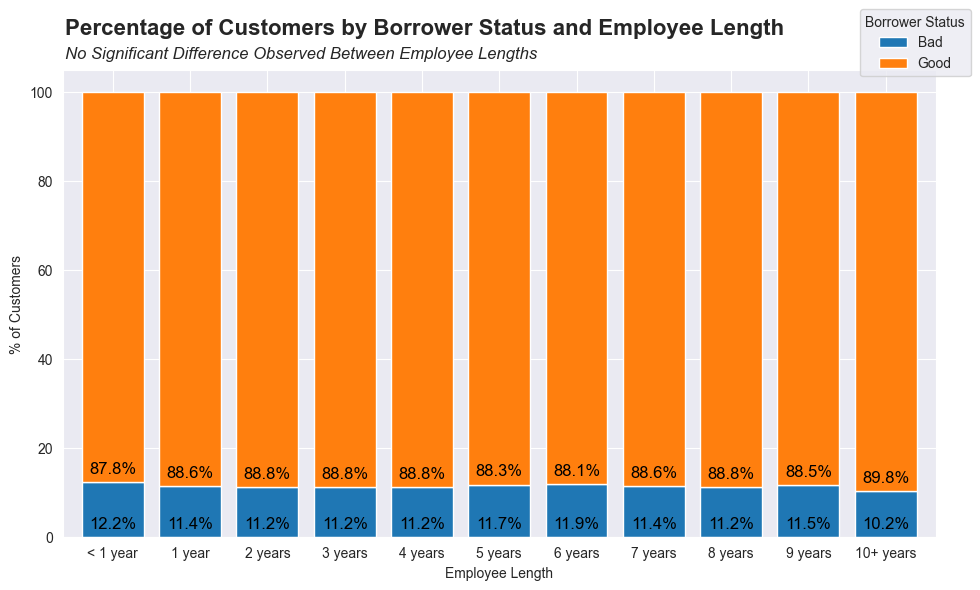

In [17]:
emp_length_order = config_data['emp_length']
df_loan = loan_cat.groupby('emp_length')['good_borrower'].value_counts()
df_loan = (df_loan / df_loan.groupby(level=0).sum()) * 100

utils.stacked_bar_proportion(data=df_loan, 
                             col="Employee Length",
                             subtitle="No Significant Difference Observed Between Employee Lengths",
                             order=emp_length_order)

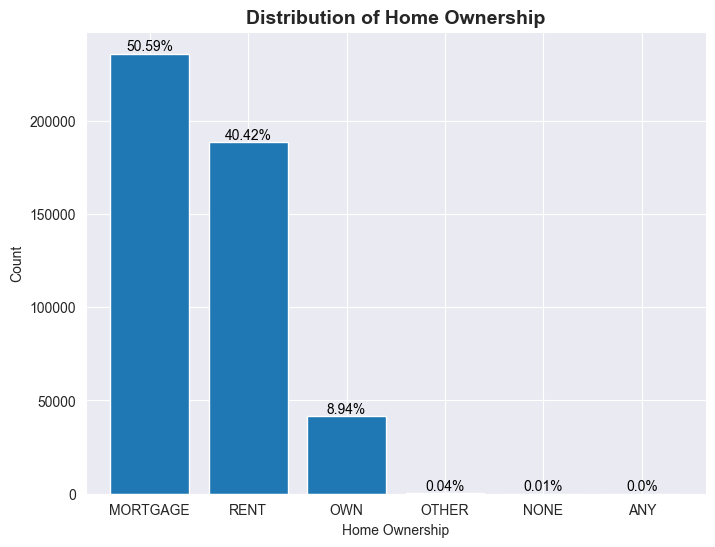

In [75]:
fig, ax = plt.subplots(figsize=(8,6))
loan_cat['home_ownership'].value_counts().plot(kind='bar', rot=0, width=0.8)
utils.annotate_text(data=loan_cat['home_ownership'], 
                    axis=ax, 
                    prop=True, 
                    fontsize=10)
plt.title("Distribution of Home Ownership", fontdict={'fontsize':14, 'weight':'bold'})
plt.xlabel("Home Ownership")
plt.ylabel("Count")
plt.show()

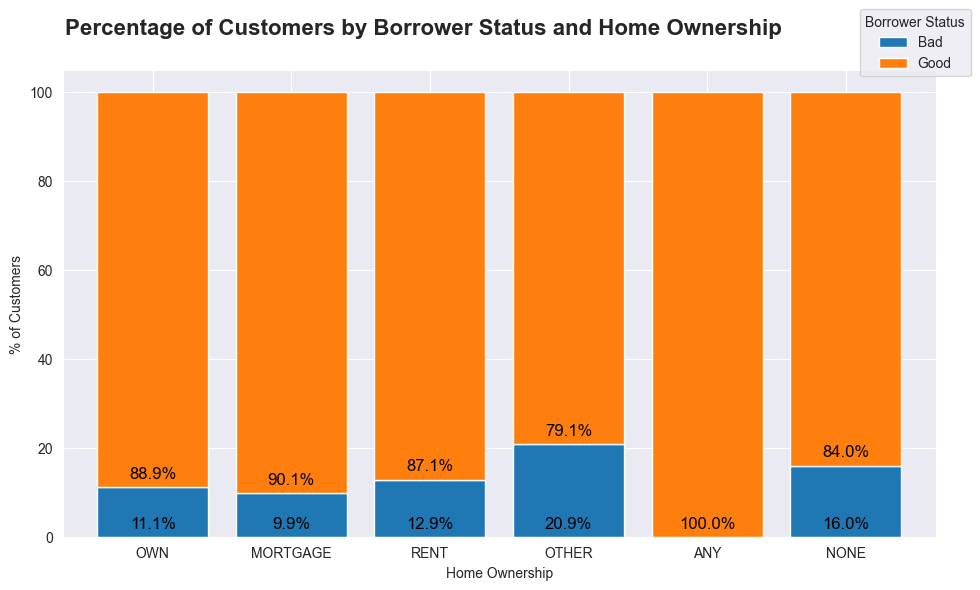

In [19]:
home_ownership_order = config_data['home_ownership']
df_loan = loan_cat.groupby('home_ownership')['good_borrower'].value_counts()
df_loan = (df_loan / df_loan.groupby(level=0).sum()) * 100

utils.stacked_bar_proportion(data=df_loan, 
                             col='home_ownership', 
                             subtitle="",
                             order=home_ownership_order)

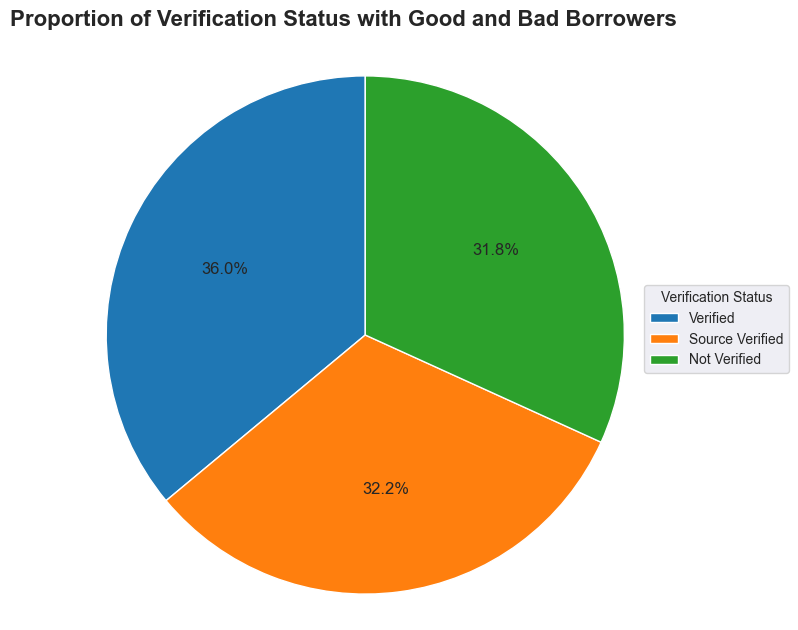

In [20]:
utils.pie_proportion(data=loan_cat, col='verification_status', 
                     subtitle="")

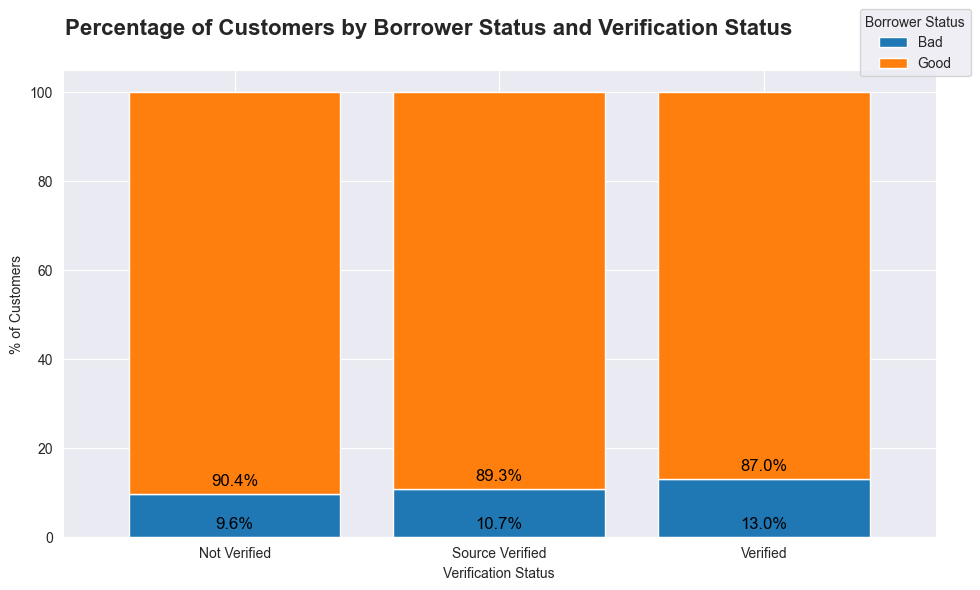

In [21]:
df_loan = loan_cat.groupby('verification_status')['good_borrower'].value_counts()
df_loan = (df_loan / df_loan.groupby(level=0).sum()) * 100

utils.stacked_bar_proportion(data=df_loan, 
                             col='Verification Status', 
                             subtitle="")

In [22]:
print(f"Total unique value of Issue Date: {loan_cat['issue_d'].nunique()}\n")
print(loan_cat['issue_d'].value_counts())

Total unique value of Issue Date: 91

issue_d
Oct-14    38782
Jul-14    29306
Nov-14    25054
May-14    19099
Apr-14    19071
          ...  
Aug-07       74
Jul-07       63
Sep-08       57
Sep-07       53
Jun-07       24
Name: count, Length: 91, dtype: int64


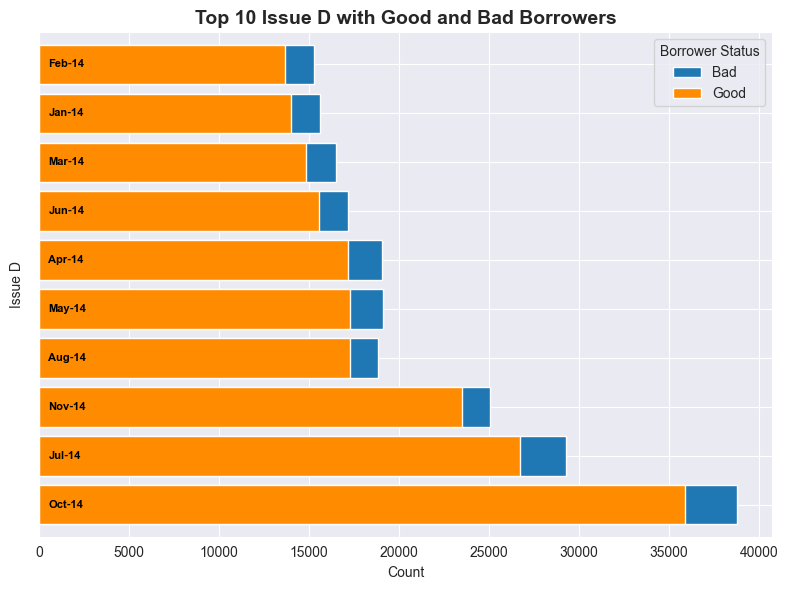

In [23]:
utils.top_stacked_bar(data=loan_cat, 
                      col='issue_d',
                      xpad=500)

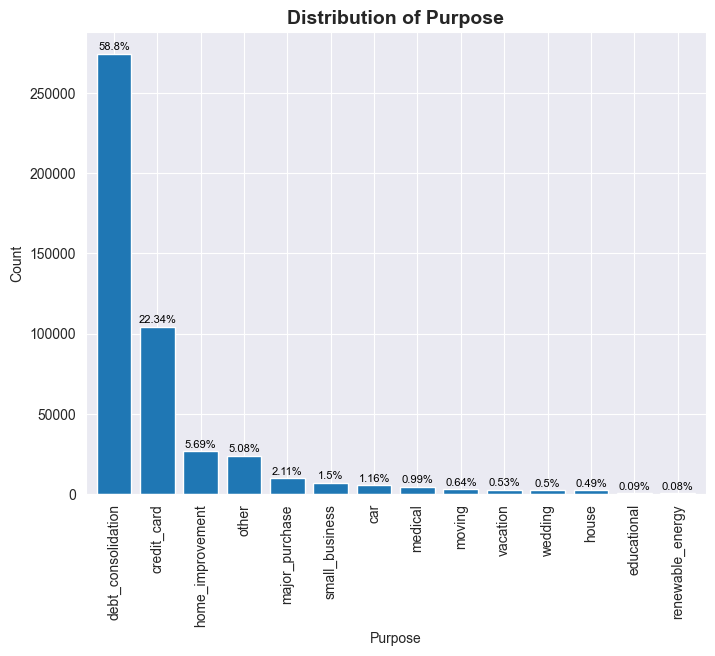

In [24]:
fig, ax = plt.subplots(figsize=(8,6))
loan_cat['purpose'].value_counts().plot(kind='bar', rot=90, width=0.8)
utils.annotate_text(data=loan_cat['purpose'], 
                    axis=ax, 
                    prop=True, 
                    fontsize=8)
ax.set_title("Distribution of Purpose", fontdict={'fontsize':14, 'weight':'bold'})
ax.set_xlabel("Purpose")
ax.set_ylabel("Count")
plt.show()

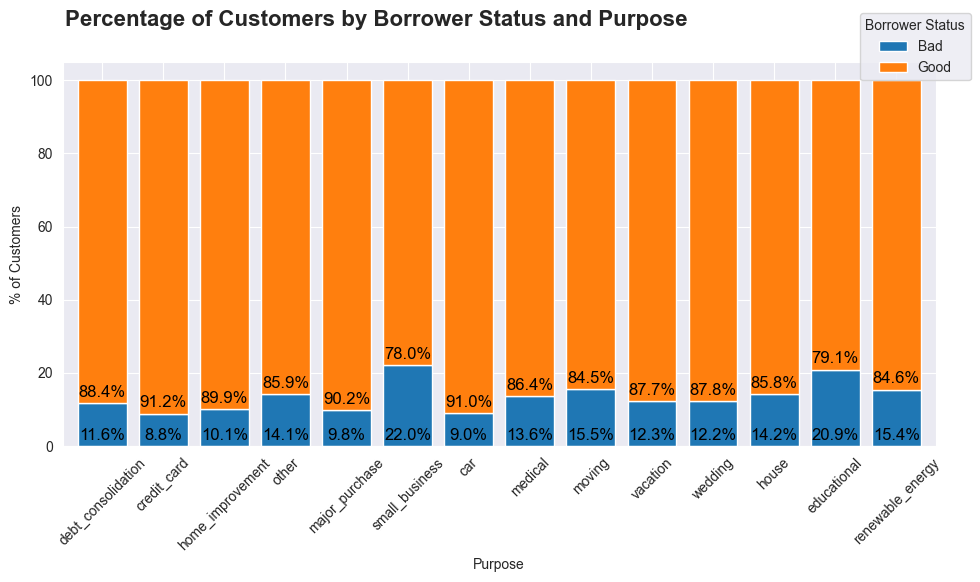

In [25]:
purpose_order = config_data['purpose']
df_loan = loan_cat.groupby('purpose')['good_borrower'].value_counts()
df_loan = (df_loan / df_loan.groupby(level=0).sum()) * 100

utils.stacked_bar_proportion(data=df_loan, 
                             col="Purpose", 
                             subtitle="",
                             order=purpose_order,
                             rot=45)

In [26]:
print(f"Total unique value of addreas State: {loan_cat['addr_state'].nunique()}\n")
print(loan_cat['addr_state'].value_counts())

Total unique value of addreas State: 50

addr_state
CA    71450
NY    40242
TX    36439
FL    31637
IL    18612
NJ    18061
PA    16424
OH    15237
GA    14975
VA    14222
NC    12682
MI    11549
MA    11072
MD    10974
AZ    10712
WA    10517
CO     9739
MN     8158
MO     7508
CT     7204
IN     6525
NV     6519
TN     5984
OR     5949
WI     5911
AL     5853
SC     5583
LA     5489
KY     4438
KS     4190
OK     4117
AR     3488
UT     3428
NM     2588
HI     2487
WV     2412
NH     2232
RI     2050
DC     1426
MT     1396
DE     1272
AK     1251
MS     1226
WY     1128
SD      980
VT      905
IA       14
NE       14
ID       12
ME        4
Name: count, dtype: int64


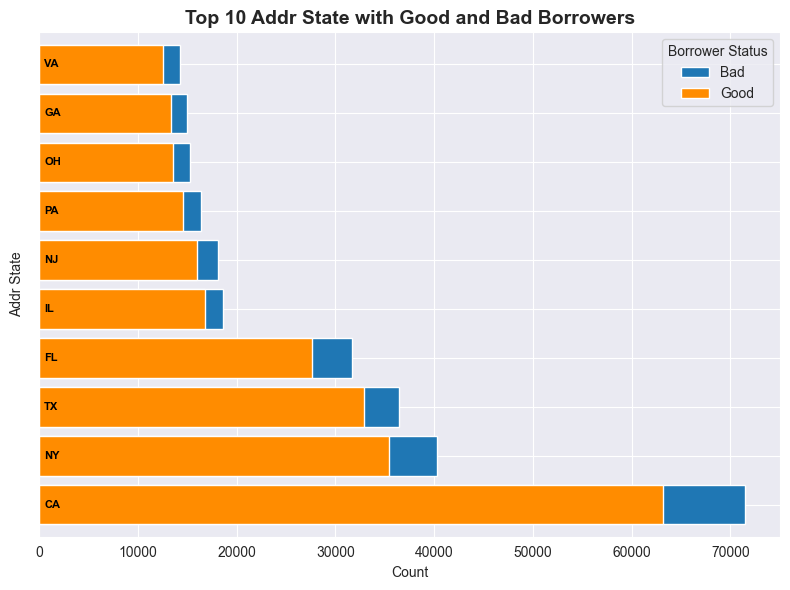

In [27]:
utils.top_stacked_bar(data=loan_cat, 
                      col='addr_state',
                      xpad=500)

In [28]:
print(f"Total unique value of earliest credit line: {loan_cat['earliest_cr_line'].nunique()}\n")
print(loan_cat['earliest_cr_line'].value_counts())

Total unique value of earliest credit line: 664

earliest_cr_line
Oct-00    3674
Aug-00    3597
Aug-01    3455
Oct-99    3406
Oct-01    3329
          ... 
Jul-55       1
Feb-57       1
Oct-54       1
May-53       1
Nov-56       1
Name: count, Length: 664, dtype: int64


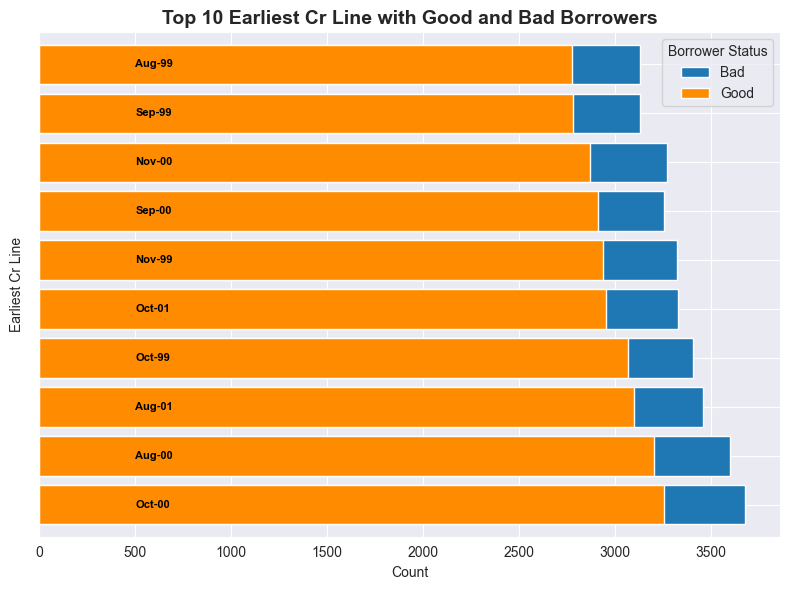

In [29]:
utils.top_stacked_bar(data=loan_cat, 
                      col='earliest_cr_line',
                      xpad=500)

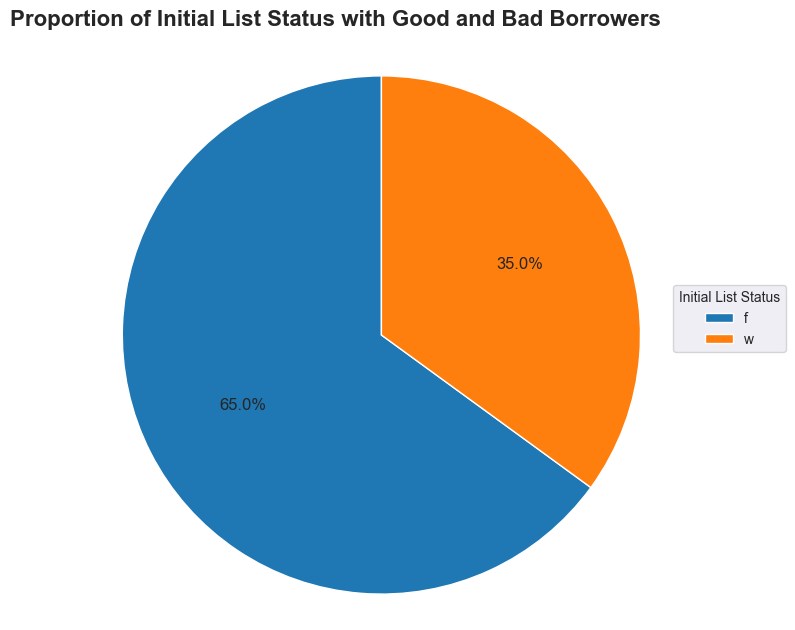

In [30]:
utils.pie_proportion(data=loan_cat, col='initial_list_status', 
                     subtitle="")

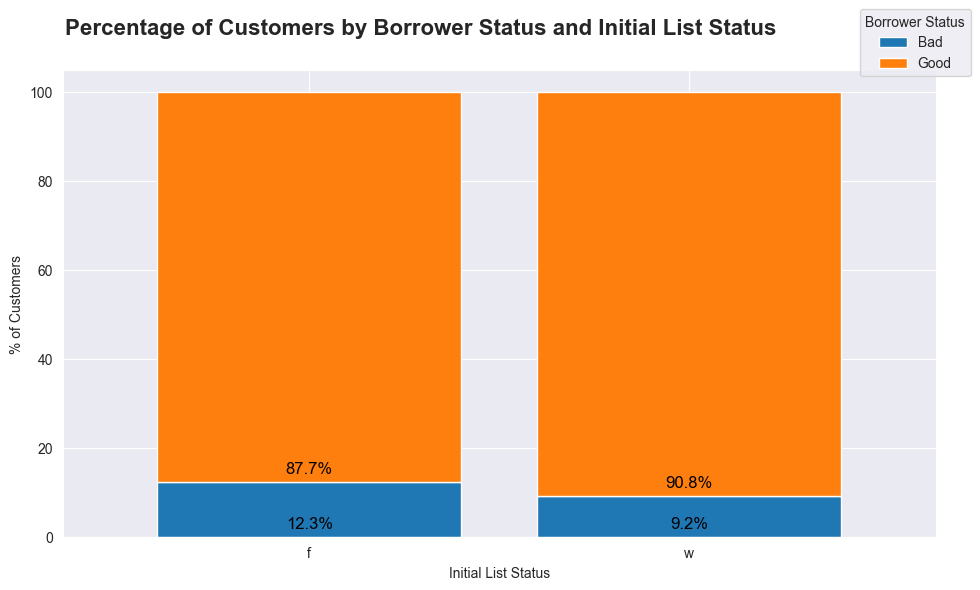

In [31]:
df_loan = loan_cat.groupby('initial_list_status')['good_borrower'].value_counts()
df_loan = (df_loan / df_loan.groupby(level=0).sum()) * 100

utils.stacked_bar_proportion(data=df_loan, 
                             col="Initial List Status", 
                             subtitle="")

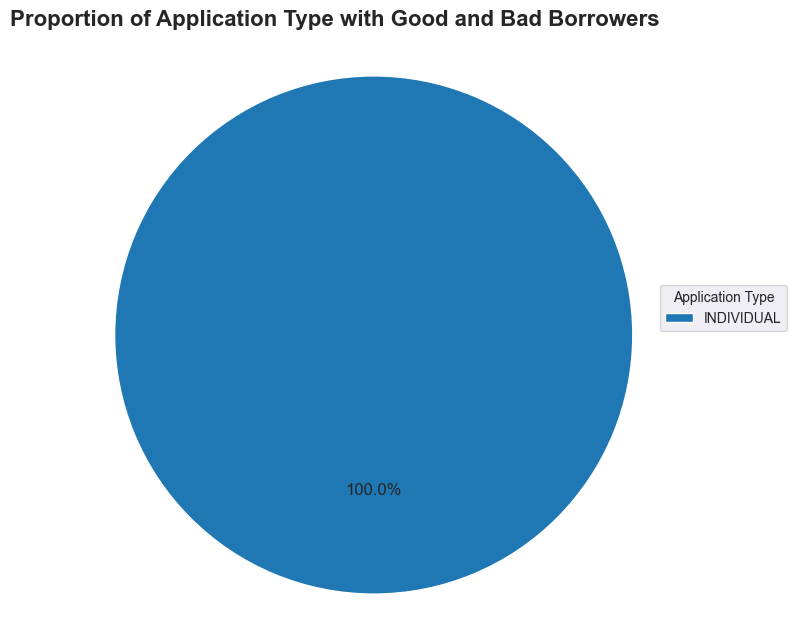

In [32]:
utils.pie_proportion(data=loan_cat, col='application_type', 
                     subtitle="")

### **Numerical Features**

In [33]:
loan_num = loan_df.select_dtypes([int, float])
loan_num.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collections_12_mths_ex_med,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,good_borrower
0,5000,5000,4975.0,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,13648,83.7,9.0,0.0,0.0,NaN,NaN,NaN,1
1,2500,2500,2500.0,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,1687,9.4,4.0,0.0,0.0,NaN,NaN,NaN,0
2,2400,2400,2400.0,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,2956,98.5,10.0,0.0,0.0,NaN,NaN,NaN,1
3,10000,10000,10000.0,13.49,339.31,49200.0,20.00,0.0,1.0,10.0,0.0,5598,21.0,37.0,0.0,0.0,NaN,NaN,NaN,1
4,3000,3000,3000.0,12.69,67.79,80000.0,17.94,0.0,0.0,15.0,0.0,27783,53.9,38.0,0.0,0.0,NaN,NaN,NaN,1


In [34]:
loan_null = loan_num.isna().sum().sort_values(ascending=False).to_frame(name='count')
loan_null['%rate'] = (loan_null['count'] / len(loan) * 100).astype(int).astype(str) + '%'
loan_null

,count,%rate
total_rev_hi_lim,70276,15%
tot_cur_bal,70276,15%
tot_coll_amt,70276,15%
revol_util,340,0%
collections_12_mths_ex_med,145,0%
pub_rec,29,0%
acc_now_delinq,29,0%
delinq_2yrs,29,0%
inq_last_6mths,29,0%
open_acc,29,0%


In [35]:
loan_num.corr().loc['good_borrower',:].abs().sort_values(ascending=False).to_frame(name='corr_abs')

,corr_abs
good_borrower,1.000000
int_rate,0.174648
inq_last_6mths,0.073109
revol_util,0.051020
tot_cur_bal,0.050865
annual_inc,0.049484
dti,0.049092
total_rev_hi_lim,0.037735
total_acc,0.022366
revol_bal,0.018536


In [36]:
loan_num = loan_num.drop(config_data['low_corr_columns'], axis=1)
loan_num.sample(5)

,loan_amnt,funded_amnt,int_rate,installment,annual_inc,dti,inq_last_6mths,revol_bal,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,good_borrower
108467,15000,15000,13.68,346.55,37000.0,15.89,1.0,5146,35.2,49.0,124751.0,14600.0,1
201122,19125,19125,12.12,636.33,48000.0,19.73,0.0,19239,34.1,34.0,147778.0,56400.0,1
55336,6000,6000,12.99,202.14,25000.0,10.18,0.0,8134,83.0,10.0,8134.0,9800.0,1
221018,15000,15000,13.67,510.27,72000.0,17.41,0.0,10135,57.3,30.0,NaN,NaN,1
326588,28000,28000,6.49,858.05,205000.0,8.92,0.0,27379,31.6,38.0,505867.0,86700.0,1


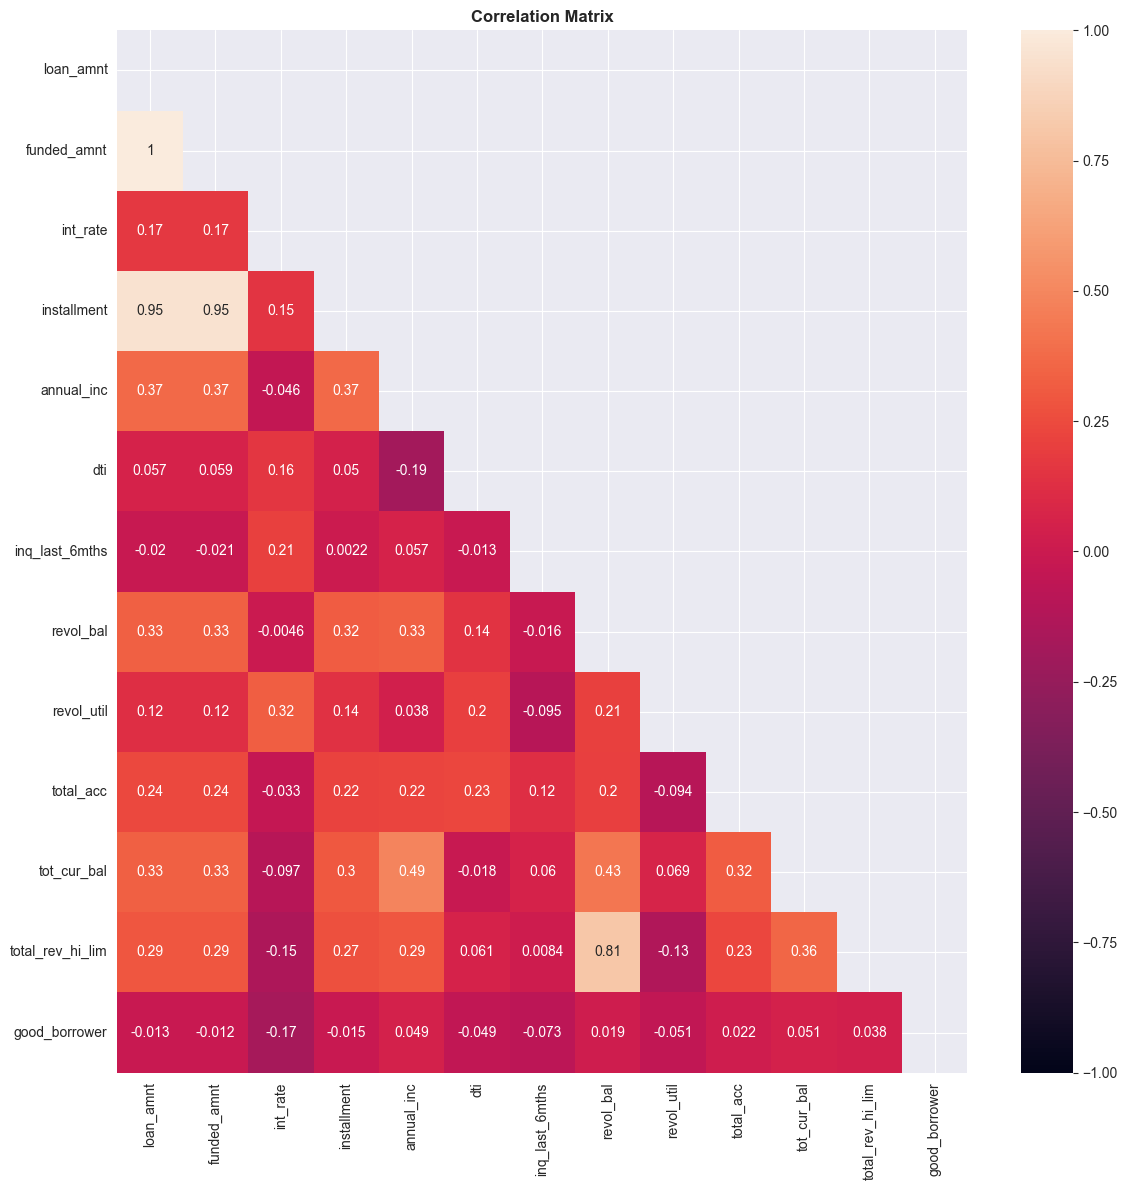

In [37]:
corr_matrix = loan_num.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, mask=mask, annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontdict={'weight':'bold'})
plt.tight_layout()
plt.show()

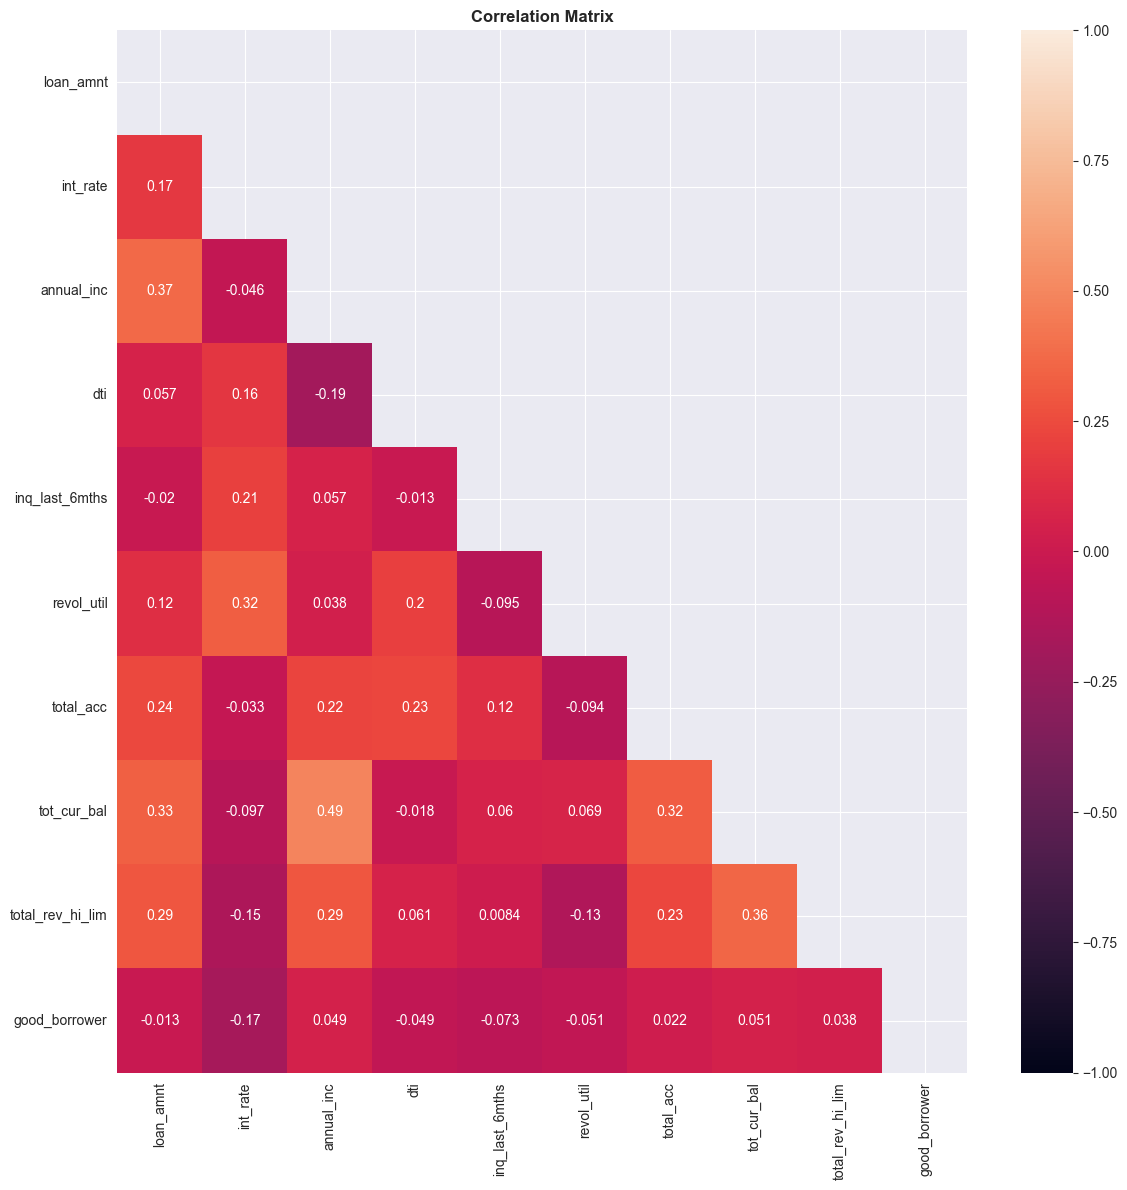

In [38]:
loan_num = loan_num.drop(config_data['multicolinearity_columns'], axis=1)

corr_matrix = loan_num.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix, mask=mask, annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix', fontdict={'weight':'bold'})
plt.tight_layout()
plt.show()

In [39]:
loan_num.describe()

,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,good_borrower
count,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,465945.000000,466256.000000,3.960090e+05,3.960090e+05,466285.000000
mean,14317.277577,13.829236,7.327738e+04,17.218758,0.804745,56.176947,25.064430,1.388017e+05,3.037909e+04,0.888081
std,8286.509164,4.357587,5.496357e+04,7.851121,1.091598,23.732628,11.600141,1.521147e+05,3.724713e+04,0.315267
min,500.000000,5.420000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000
25%,8000.000000,10.990000,4.500000e+04,11.360000,0.000000,39.200000,17.000000,2.861800e+04,1.350000e+04,1.000000
50%,12000.000000,13.660000,6.300000e+04,16.870000,0.000000,57.600000,23.000000,8.153900e+04,2.280000e+04,1.000000
75%,20000.000000,16.490000,8.896000e+04,22.780000,1.000000,74.700000,32.000000,2.089530e+05,3.790000e+04,1.000000
max,35000.000000,26.060000,7.500000e+06,39.990000,33.000000,892.300000,156.000000,8.000078e+06,9.999999e+06,1.000000


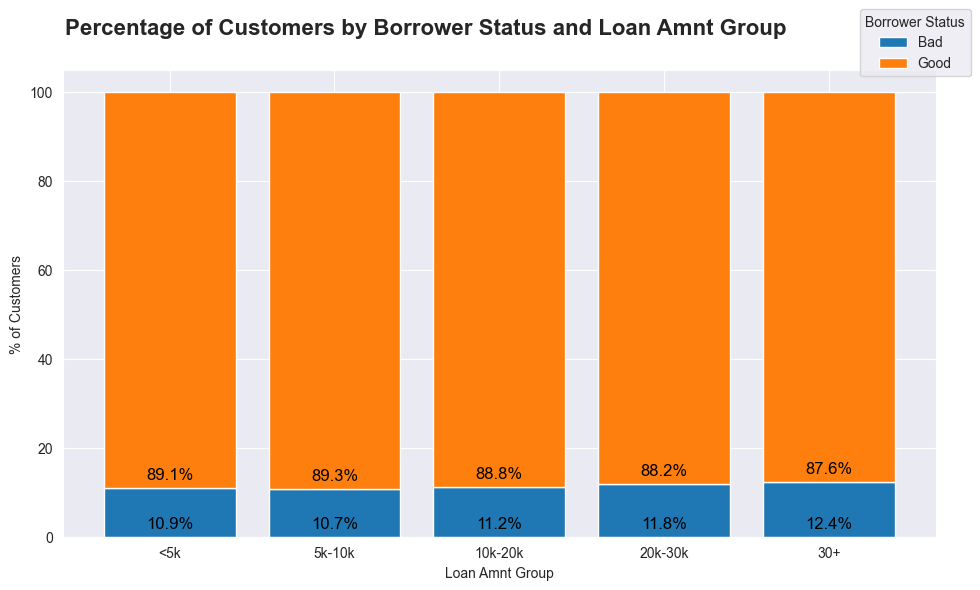

In [40]:
bins_group = [0, 5000, 10000, 20000, 30000, np.inf]
labels_group = ['<5k', '5k-10k', '10k-20k', '20k-30k', '30+']
loan_num['loan_amnt_group'] = pd.cut(loan_num['loan_amnt'], bins=bins_group, labels=labels_group)

df_loan = loan_num.groupby('loan_amnt_group')['good_borrower'].value_counts()
df_loan = (df_loan / df_loan.groupby(level=0).sum()) * 100
utils.stacked_bar_proportion(data=df_loan, 
                             col="loan_amnt_group", 
                             subtitle="")

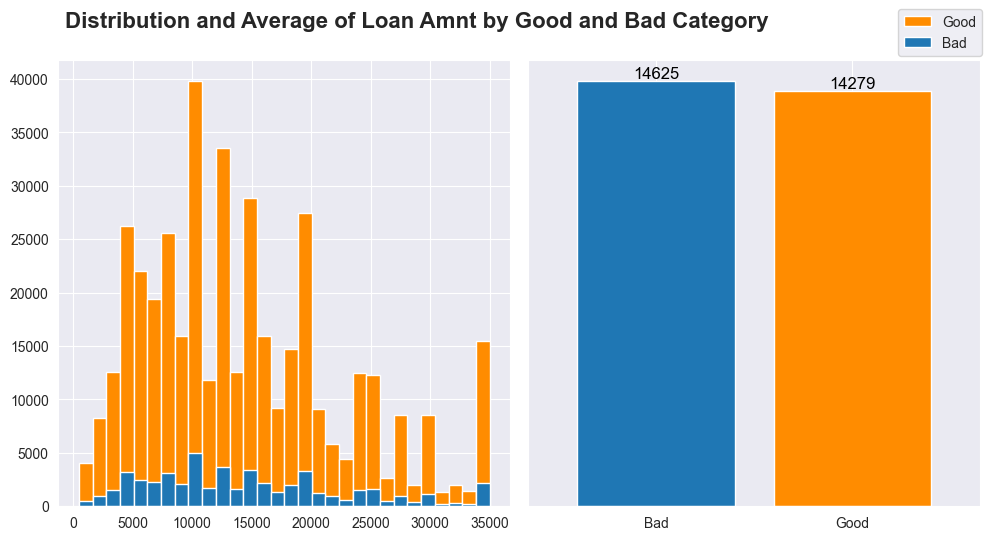

In [41]:
utils.dist_mean_numerical(data=loan_num, 
                          col='loan_amnt',
                          subtitle='')

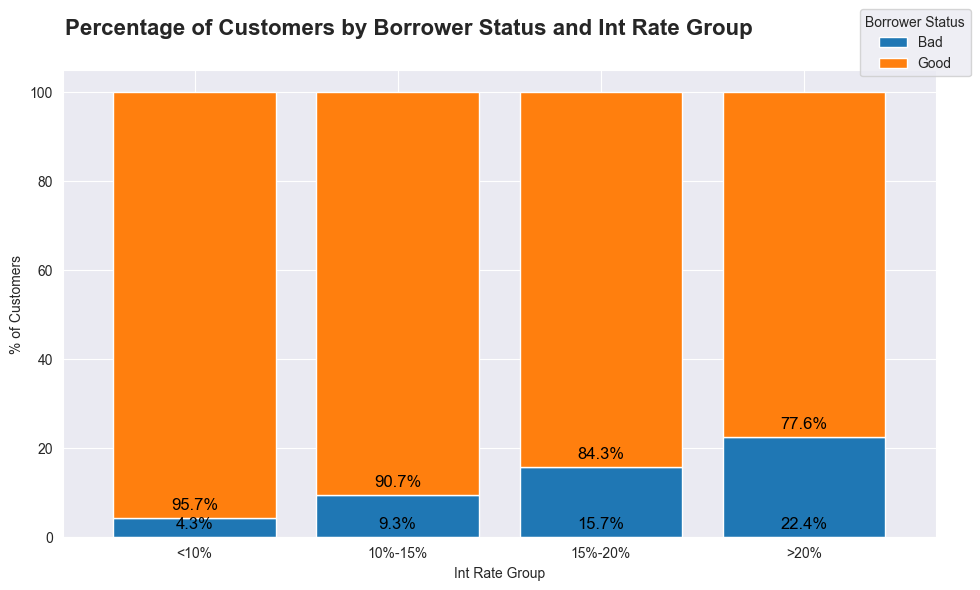

In [42]:
bins_group = [0, 10, 15, 20, np.inf]
labels_group = ['<10%', '10%-15%', '15%-20%', '>20%']
loan_num['int_rate_group'] = pd.cut(loan_num['int_rate'], bins=bins_group, labels=labels_group)

df_loan = loan_num.groupby('int_rate_group')['good_borrower'].value_counts()
df_loan = (df_loan / df_loan.groupby(level=0).sum()) * 100
utils.stacked_bar_proportion(data=df_loan, 
                             col="int_rate_group", 
                             subtitle="")

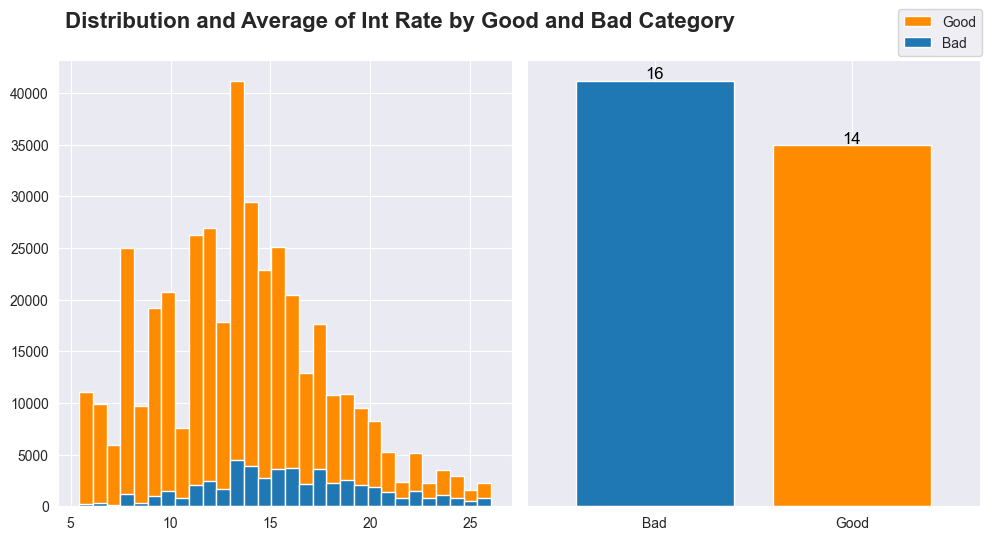

In [43]:
utils.dist_mean_numerical(data=loan_num, 
                          col='int_rate',
                          subtitle='')

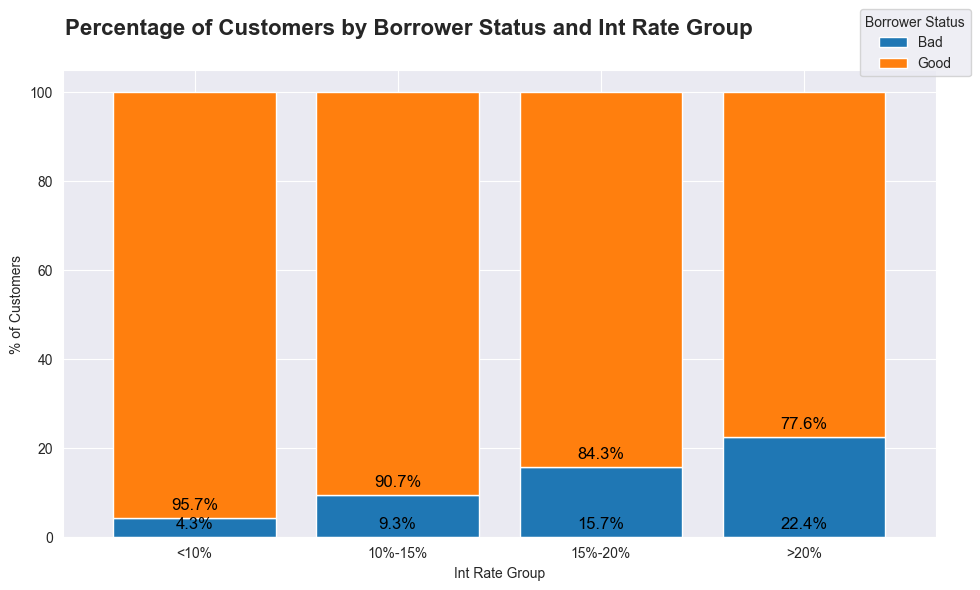

In [ ]:
bins_group = [0, 10, 15, 20, np.inf]
labels_group = ['<10%', '10%-15%', '15%-20%', '>20%']
loan_num['int_rate_group'] = pd.cut(loan_num['int_rate'], bins=bins_group, labels=labels_group)

df_loan = loan_num.groupby('int_rate_group')['good_borrower'].value_counts()
df_loan = (df_loan / df_loan.groupby(level=0).sum()) * 100
utils.stacked_bar_proportion(data=df_loan, 
                             col="int_rate_group", 
                             subtitle="")

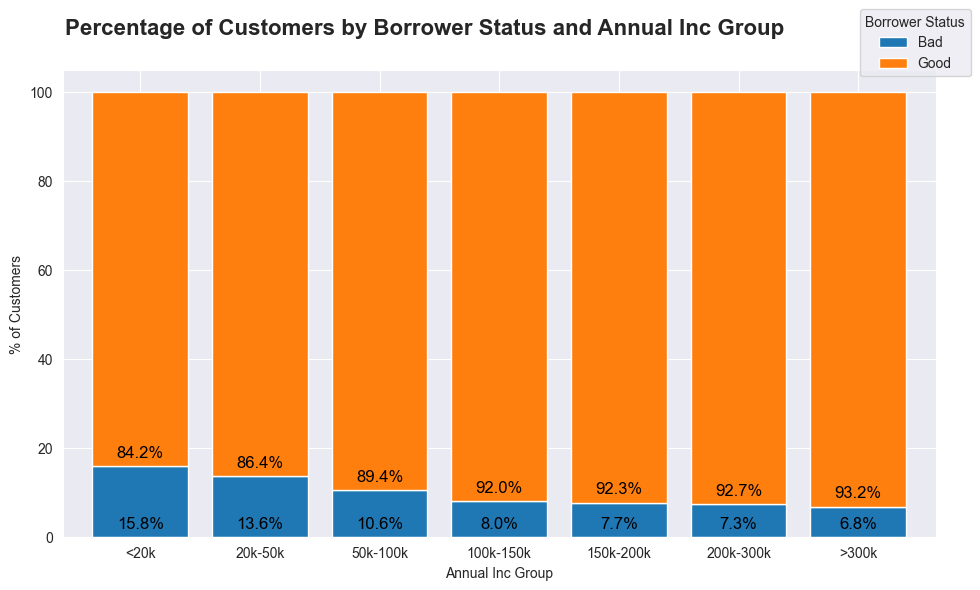

In [45]:
bins_group = [0, 20000, 50000, 100000, 150000, 200000, 300000, np.inf]
labels_group = ['<20k', '20k-50k', '50k-100k', '100k-150k', '150k-200k', '200k-300k', '>300k']
loan_num['annual_inc_group'] = pd.cut(loan_num['annual_inc'], bins=bins_group, labels=labels_group)

df_loan = loan_num.groupby('annual_inc_group')['good_borrower'].value_counts()
df_loan = (df_loan / df_loan.groupby(level=0).sum()) * 100
utils.stacked_bar_proportion(data=df_loan, 
                             col="annual_inc_group", 
                             subtitle="")

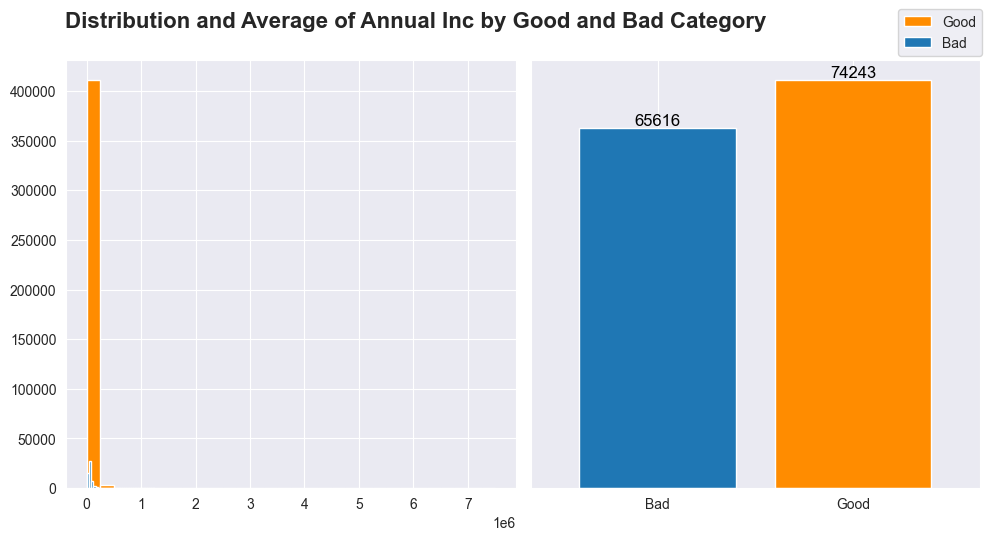

In [46]:
utils.dist_mean_numerical(data=loan_num,
                          col='annual_inc',
                          subtitle='')

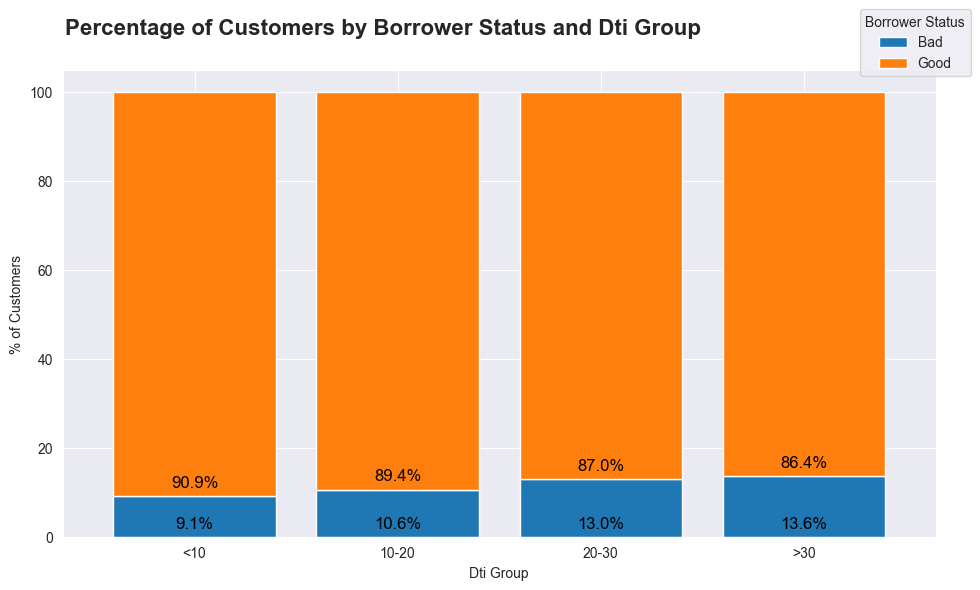

In [47]:
bins_group = [0, 10, 20, 30, np.inf]
labels_group = ['<10', '10-20', '20-30', '>30']
loan_num['dti_group'] = pd.cut(loan_num['dti'], bins=bins_group, labels=labels_group)

df_loan = loan_num.groupby('dti_group')['good_borrower'].value_counts()
df_loan = (df_loan / df_loan.groupby(level=0).sum()) * 100
utils.stacked_bar_proportion(data=df_loan, 
                             col="dti_group", 
                             subtitle="")

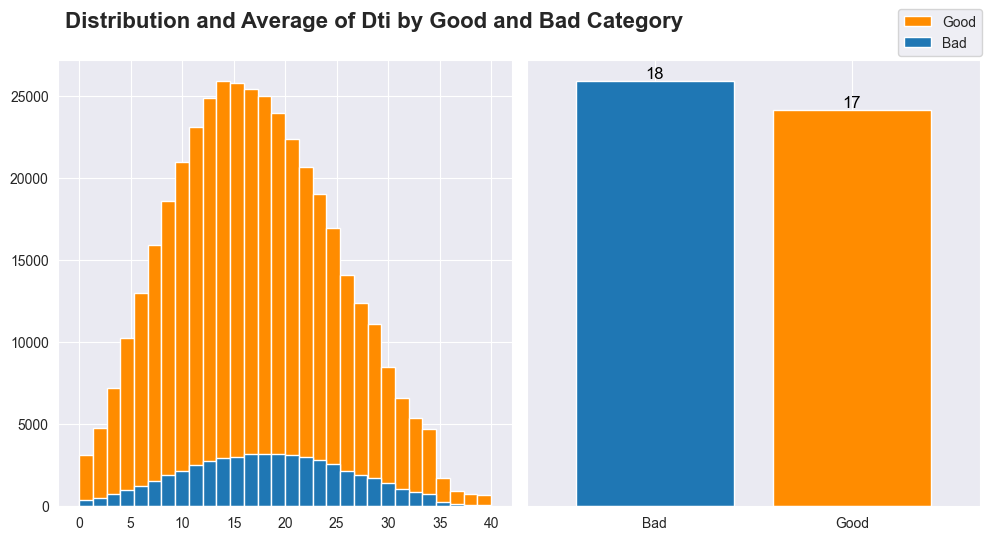

In [48]:
utils.dist_mean_numerical(data=loan_num,
                          col='dti',
                          subtitle='')

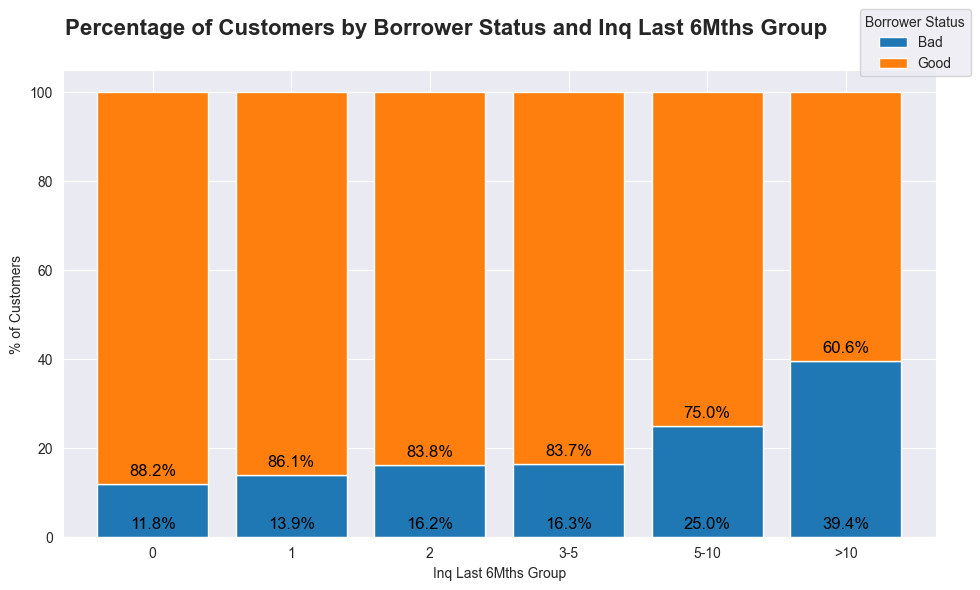

In [50]:
bins_group = [0, 1, 2, 3, 5, 10, np.inf]
labels_group = ['0', '1', '2', '3-5', '5-10', '>10']
loan_num['inq_last_6mths_group'] = pd.cut(loan_num['inq_last_6mths'], bins=bins_group, labels=labels_group)

df_loan = loan_num.groupby('inq_last_6mths_group')['good_borrower'].value_counts()
df_loan = (df_loan / df_loan.groupby(level=0).sum()) * 100
utils.stacked_bar_proportion(data=df_loan, 
                             col="inq_last_6mths_group", 
                             subtitle="")

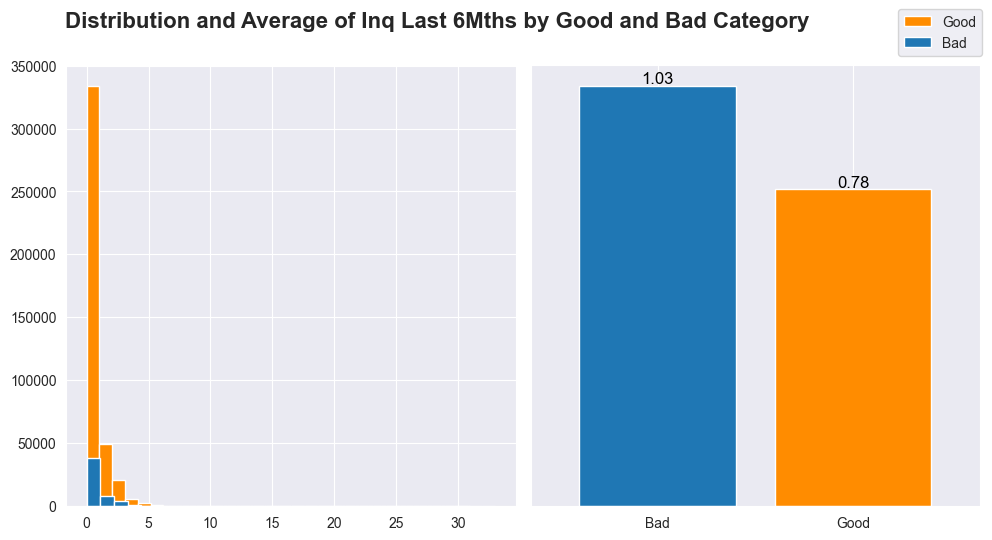

In [51]:
utils.dist_mean_numerical(data=loan_num,
                          col='inq_last_6mths',
                          subtitle='',
                          prec=True)

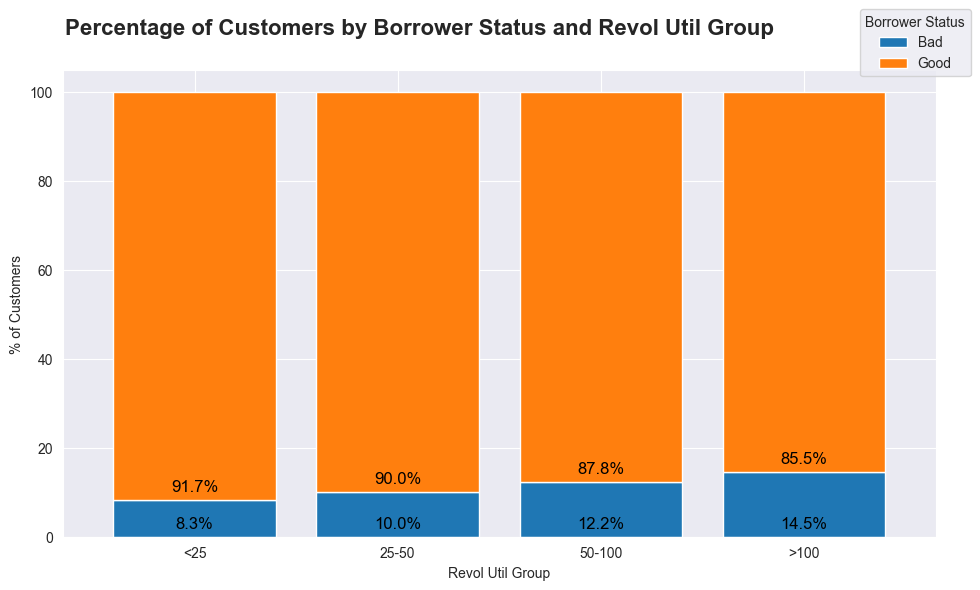

In [53]:
bins_group = [0, 25, 50, 100, np.inf]
labels_group = ['<25', '25-50', '50-100', '>100']
loan_num['revol_util_group'] = pd.cut(loan_num['revol_util'], bins=bins_group, labels=labels_group)

df_loan = loan_num.groupby('revol_util_group')['good_borrower'].value_counts()
df_loan = (df_loan / df_loan.groupby(level=0).sum()) * 100
utils.stacked_bar_proportion(data=df_loan, 
                             col="revol_util_group", 
                             subtitle="")

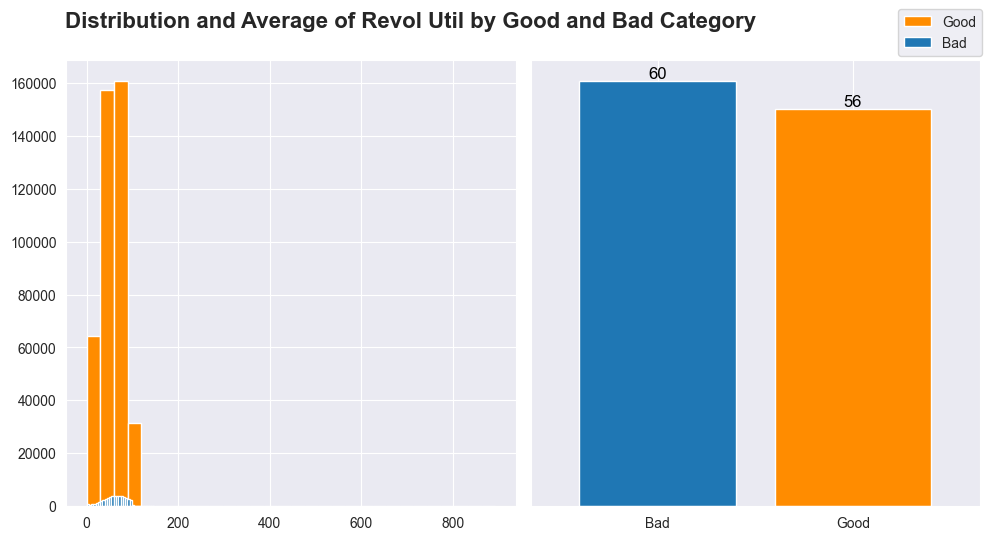

In [54]:
utils.dist_mean_numerical(data=loan_num,
                          col='revol_util',
                          subtitle='')

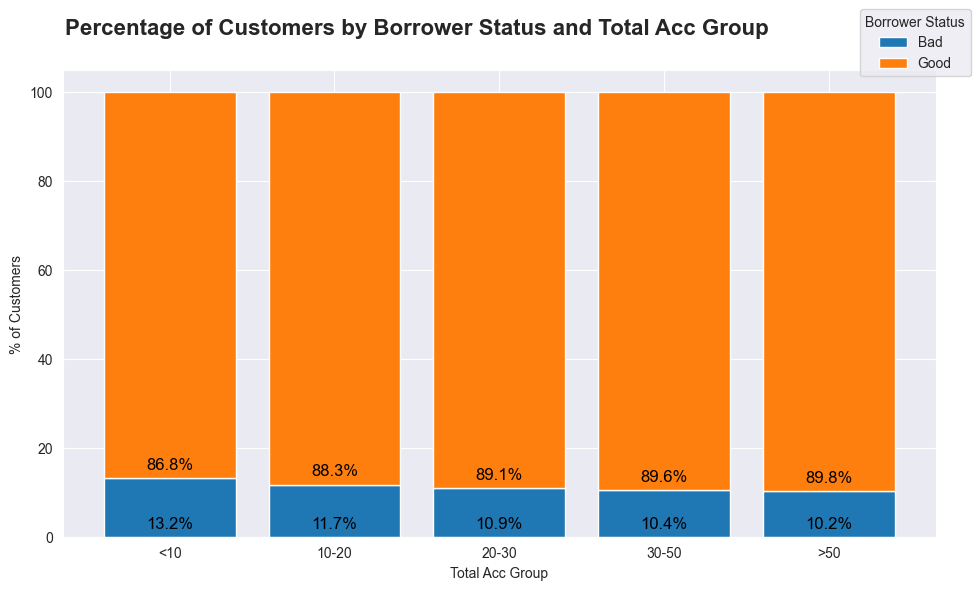

In [56]:
bins_group = [0, 10, 20, 30, 50, np.inf]
labels_group = ['<10', '10-20', '20-30', '30-50', '>50']
loan_num['total_acc_group'] = pd.cut(loan_num['total_acc'], bins=bins_group, labels=labels_group)

df_loan = loan_num.groupby('total_acc_group')['good_borrower'].value_counts()
df_loan = (df_loan / df_loan.groupby(level=0).sum()) * 100
utils.stacked_bar_proportion(data=df_loan, 
                             col="total_acc_group", 
                             subtitle="")

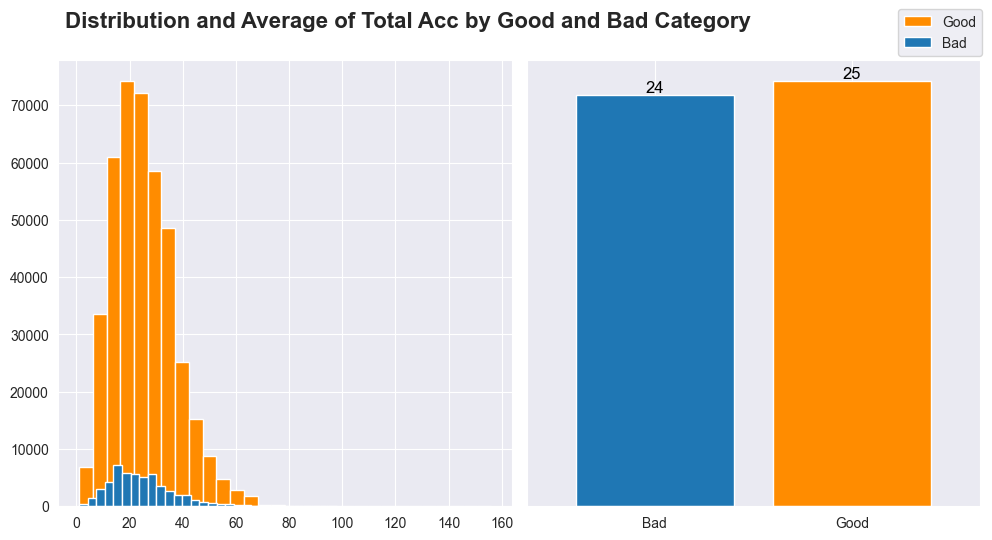

In [57]:
utils.dist_mean_numerical(data=loan_num,
                          col='total_acc',
                          subtitle='')

In [58]:
loan_num.head()

,loan_amnt,int_rate,annual_inc,dti,inq_last_6mths,revol_util,total_acc,tot_cur_bal,total_rev_hi_lim,good_borrower,loan_amnt_group,int_rate_group,annual_inc_group,dti_group,inq_last_6mths_group,revol_util_group,total_acc_group
0,5000,10.65,24000.0,27.65,1.0,83.7,9.0,NaN,NaN,1,<5k,10%-15%,20k-50k,20-30,0,50-100,<10
1,2500,15.27,30000.0,1.00,5.0,9.4,4.0,NaN,NaN,0,<5k,15%-20%,20k-50k,<10,3-5,<25,<10
2,2400,15.96,12252.0,8.72,2.0,98.5,10.0,NaN,NaN,1,<5k,15%-20%,<20k,<10,1,50-100,<10
3,10000,13.49,49200.0,20.00,1.0,21.0,37.0,NaN,NaN,1,5k-10k,10%-15%,20k-50k,10-20,0,<25,30-50
4,3000,12.69,80000.0,17.94,0.0,53.9,38.0,NaN,NaN,1,<5k,10%-15%,50k-100k,10-20,NaN,50-100,30-50


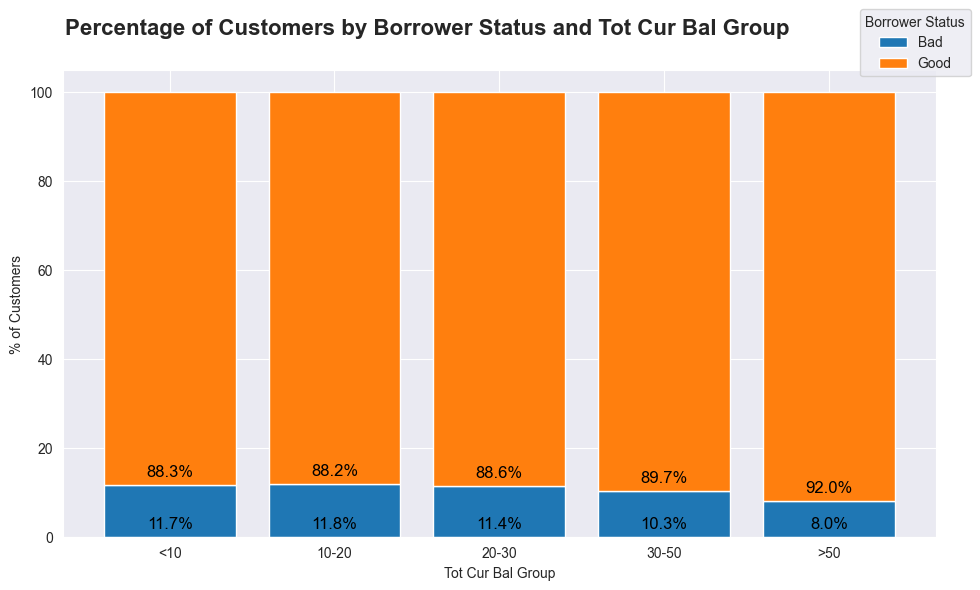

In [64]:
bins_group = [0, 25000, 50000, 100000, 200000, np.inf]
labels_group = ['<25k', '25k-50k', '50k-100k', '100k-200k', '>200k']
loan_num['tot_cur_bal_group'] = pd.cut(loan_num['tot_cur_bal'], bins=bins_group, labels=labels_group)

df_loan = loan_num.groupby('tot_cur_bal_group')['good_borrower'].value_counts()
df_loan = (df_loan / df_loan.groupby(level=0).sum()) * 100
utils.stacked_bar_proportion(data=df_loan, 
                             col="tot_cur_bal_group", 
                             subtitle="")

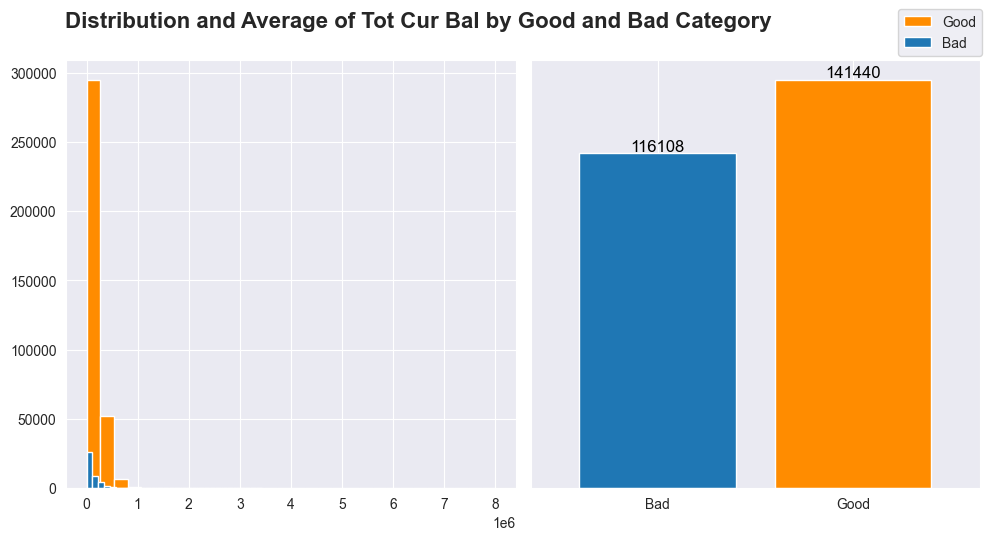

In [65]:
utils.dist_mean_numerical(data=loan_num,
                          col='tot_cur_bal',
                          subtitle='')

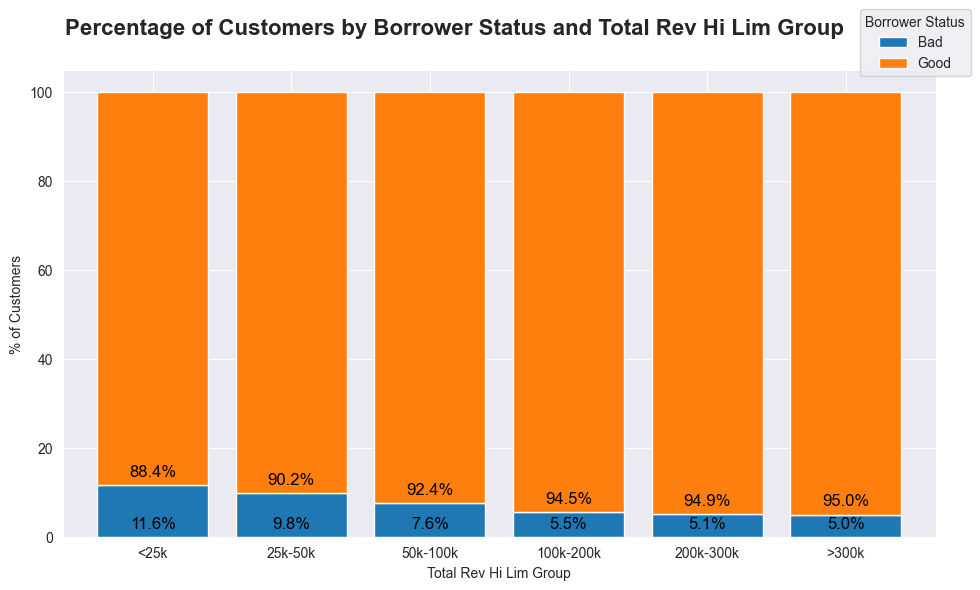

In [68]:
bins_group = [0, 25000, 50000, 100000, 200000, 300000, np.inf]
labels_group = ['<25k', '25k-50k', '50k-100k', '100k-200k', '200k-300k', '>300k']
loan_num['total_rev_hi_lim_group'] = pd.cut(loan_num['total_rev_hi_lim'], bins=bins_group, labels=labels_group)

df_loan = loan_num.groupby('total_rev_hi_lim_group')['good_borrower'].value_counts()
df_loan = (df_loan / df_loan.groupby(level=0).sum()) * 100
utils.stacked_bar_proportion(data=df_loan, 
                             col="total_rev_hi_lim_group", 
                             subtitle="")

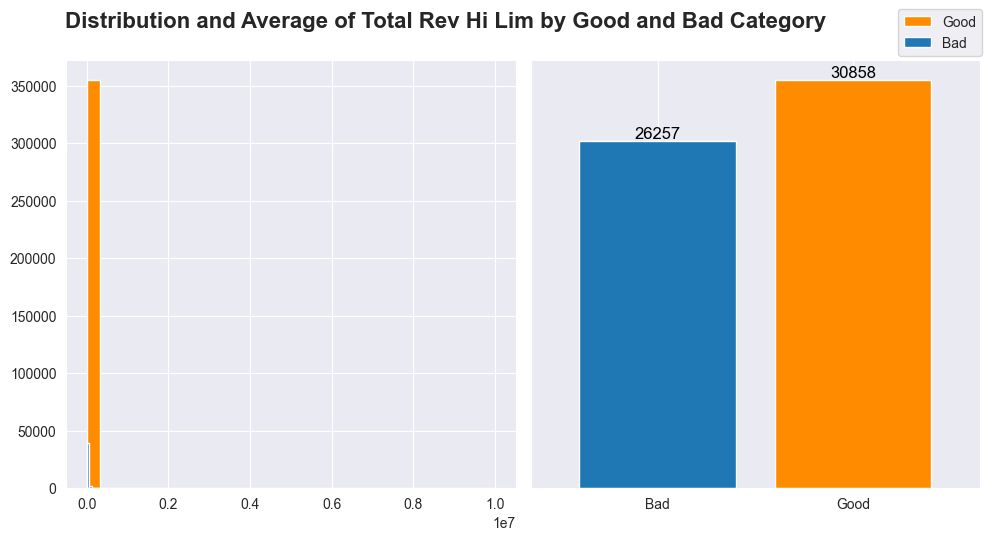

In [72]:
utils.dist_mean_numerical(data=loan_num,
                          col='total_rev_hi_lim',
                          subtitle='')